# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [11]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [12]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

In [13]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [14]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>What test is appropriate for this problem? Does CLT apply?</div> 

</div> An A/B test would be appropriate for this particular dataset since we will be working with ratios.  There are only two outcomes, the resume receives a call (1) or the resume does not receive a call (0).  We will be assesing wheter the call rate increases based on name. (Black sounding name vs White sounding name)




</div>What are the null and alternate hypotheses?

</div>The Null hypothesis is that the call rate is not affected by race, the alternative hypothesis is that race does affect call rates.  H0:p(b)=p(t)       ,      Ha:p(b) < p(t)


In [15]:
w = data[data.race=='w']
b = data[data.race=='b']
w_ratio = sum(w.call)/len(w.call)
b_ratio = sum(b.call)/len(b.call)
null_ratio = sum(data.call)/len(data.call)

print('Our sample probability of a "black sounding name" receving a call:',b_ratio)
print('Our sample probability of a "white sounding name" receving a call:',w_ratio)
print('Our sample probability of receving a call:',total_ratio)

Our sample probability of a "black sounding name" receving a call: 0.06447638603696099
Our sample probability of a "white sounding name" receving a call: 0.09650924024640657
Our sample probability of receving a call: 0.08049281314168377


CI interval 95%: [0.07289528 0.08829569]
Margin of error: [0.00780287]


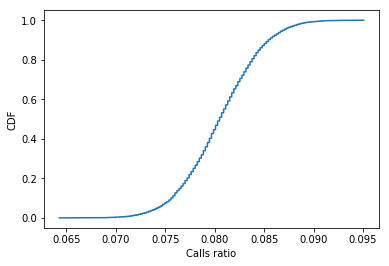

In [16]:
# Your solution to Q3 here
# Compute margin of error, confidence interval, and p-value. 
# Try using both the bootstrapping and the frequentist statistical approaches.

#bootstrap samples: bs_sample
bs_sample = np.empty(10000)
for i in range(10000):
    sample = np.random.choice(data.call, size=int(len(data)), replace = True)
    bs_sample[i]=np.sum(sample)/len(sample)


# Create a CDF from bootstrap samples: x_bs, y_bs
x_bs, y_bs = ecdf(bs_sample)

# Overlay the plots
plt.plot(x_bs, y_bs)

# Margins and axis labels
plt.xlabel('Calls ratio')
plt.ylabel('CDF')
print('CI interval 95%:',np.percentile(bs_sample,[2.5,97.5]))
print('Margin of error:',np.percentile(bs_sample,[97.5])-null_ratio)

### Notice the sample probability that a "black sounding name" receives a call is not in the 95% confidence interval.

In [17]:
# p-value from bootstrap method
p = sum(b_ratio>=bs_sample)/len(bs_sample)
print('p-value:',p)

p-value: 0.0001


### Using bootstrap samples of size 10,000 to conduct the hypothesis test, we receive a p-value of 0, implying we should reject the null hypothesis.  We should take more random samples, per our hypothesis test it is possible that race affects call rates.

In [18]:
# Frequentist Test
z_score = (b_ratio - null_ratio)/(np.sqrt((null_ratio*(1-null_ratio))/len(data.call)))
z_score

-4.108412152434345

### The z-score from our hypothesis test is well within the rejection region giving a very small p-value, so we reject the null hypothesis that race does not affect the call rate.

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>Write a story describing the statistical significance in the context or the original problem.

</div>After conducting the above tests on our sample data, we find statistical significance that call rates may be affected by race.  Our null hypothesis that race does not affect call rates was rejected by both of our tests, both the frequentist test and bootstrap test resulted in the null hypothesis being rejected.


</div>Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

</div>No, we have not conducted tests on the other possible variables that have a factor in callback success so we can't say race/name is the most important factor.  An appropriate analysis of our tests would be to reject the null hypothesis that race/name have no affect on callback rates.  Per our sample data there is statistical significance between race/name and callback rates, we could possibly conduct more random sampling to verify.